Black Picxel Caculation (黑色畫素計算) 及飼料覆蓋率計算的的程式碼, 這裡包括Main Code，Fine Tuning of HSV color filtering 以及對批量分析照片自動輸出的部分

最後為擬合和評測部分

In [1]:
import cv2
import numpy as np

## MAIN CODE ##

def calculate_coverage(image, lower_color, upper_color):
    # Converting images into HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Creating masks to extract specific color areas by color thresholding
    mask = cv2.inRange(hsv_image, lower_color, upper_color)
    
    # Counting the number of non-zero pixel points in a mask
    total_pixels = np.sum(mask > 0)
    
    # Calculation of coverage
    coverage = (total_pixels / (image.shape[0] * image.shape[1])) * 100
    
    return coverage

# Read File
image_path = 'test1.png'
image = cv2.imread(image_path)

# Define intervals for specific colors（示例為黑褐色）

lower_color = np.array([0, 0, 0])  # HSV 下的顏色下限
upper_color = np.array([39, 130, 80])  # HSV 下的顏色上限

# Output Coverage
coverage = calculate_coverage(image, lower_color, upper_color)
print(f'coverage of feed (dark brown)：{coverage:.2f}%')


coverage of feed (dark brown)：10.07%


In [2]:
# For Testing

image_path = 'test1.png'
image = cv2.imread(image_path)

lower_color = np.array([0, 0, 0])
upper_color = np.array([39, 130, 80])

coverage = calculate_coverage(image, lower_color, upper_color)
print(f'coverage of feed (dark brown)：{coverage:.2f}%')

coverage of feed (dark brown)：10.07%


In [26]:
# For Fine Tuning of HSV color filtering

# 由於每個樣本（影片）的飼料顏色區間有差別，在這裡導入需要尋找 HSV 空間的照片放這裡，已找到最適合濾出飼料的 HSV空間

import cv2
import numpy as np

def nothing(x):
    pass

# Load image
image = cv2.imread('test1.png') # 需要尋找 HSV 空間的照片放這裡，並運行此部分

# Create a window
cv2.namedWindow('image')

# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing)
cv2.createTrackbar('SMin', 'image', 0, 255, nothing)
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):
    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 1 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 2 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 4 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 5 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 6 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 7 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 8 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 9 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 11 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 12 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 13 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 14 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 15 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [3]:

image_path = "test1.png"
image = cv2.imread(image_path)

# 記錄以上濾出飼料的 HSV 顏色上下限 輸入下方

lower_color = np.array([0, 0, 0])  # HSV 下的顏色下限
upper_color = np.array([39, 130, 80])  # HSV 下的顏色上限

# Convert to HSV format and color threshold
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_color, upper_color)
result = cv2.bitwise_and(image, image, mask=mask)

coverage = calculate_coverage(image, lower_color, upper_color)
print(f'coverage of feed (dark brown)：{coverage:.2f}%')

coverage of feed (dark brown)：10.07%


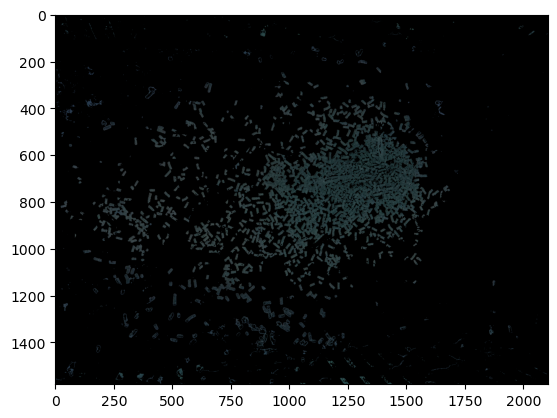

In [4]:
import matplotlib.pyplot as plt

# 查看濾色效果

plt.imshow(result,cmap='gray')
plt.show()

For Picture Packs 多張照片的批量濾色，並輸出結果

In [5]:
import numpy as np
import os

sourceDir = ('test_sf_00') # Picture Packs 位置

img_list = sorted((os.listdir(sourceDir)),key=len)

img_list

['300.jpg',
 '600.jpg',
 '900.jpg',
 '1200.jpg',
 '1500.jpg',
 '1800.jpg',
 '2100.jpg',
 '2400.jpg',
 '2700.jpg',
 '3000.jpg',
 '3300.jpg',
 '3600.jpg',
 '3900.jpg',
 '4200.jpg',
 '4500.jpg',
 '4800.jpg',
 '5100.jpg',
 '5400.jpg',
 '5700.jpg',
 '6000.jpg',
 '6300.jpg',
 '6600.jpg',
 '6900.jpg',
 '7200.jpg',
 '7500.jpg',
 '7800.jpg',
 '8100.jpg',
 '8400.jpg',
 '8700.jpg',
 '9000.jpg',
 '9300.jpg',
 '9600.jpg',
 '9900.jpg',
 '10200.jpg',
 '10500.jpg',
 '10800.jpg',
 '11100.jpg',
 '11400.jpg',
 '11700.jpg',
 '12000.jpg',
 '12300.jpg',
 '12600.jpg',
 '12900.jpg',
 '13200.jpg',
 '13500.jpg',
 '13800.jpg',
 '14100.jpg',
 '14400.jpg',
 '14700.jpg',
 '15000.jpg',
 '15300.jpg',
 '15600.jpg',
 '15900.jpg',
 '16200.jpg',
 '16500.jpg',
 '16800.jpg',
 '17100.jpg',
 '17400.jpg',
 '17700.jpg',
 '18000.jpg',
 '18300.jpg',
 '18600.jpg',
 '18900.jpg',
 '19200.jpg',
 '19500.jpg',
 '19800.jpg',
 '20100.jpg',
 '20400.jpg',
 '20700.jpg',
 '21000.jpg',
 '21300.jpg',
 '21600.jpg',
 '21900.jpg',
 '22200.jpg',


In [6]:
coverage_list = []

for i in img_list:
   
   image_path = os.path.join(sourceDir, i)
   image = cv2.imread(image_path)

   # 定义特定颜色的区间（示例为黑褐色）

   lower_color = np.array([30, 90, 10])  # HSV下的颜色下限
   upper_color = np.array([35, 180, 45])  # HSV下的颜色上限 

   coverage = calculate_coverage(image, lower_color, upper_color)
   coverage_list = np.append(coverage_list, coverage)

   print(f'coverage of feed (dark brown)：{coverage:.2f}%')

coverage of feed (dark brown)：5.11%
coverage of feed (dark brown)：5.39%
coverage of feed (dark brown)：5.40%
coverage of feed (dark brown)：4.80%
coverage of feed (dark brown)：4.65%
coverage of feed (dark brown)：4.32%
coverage of feed (dark brown)：4.24%
coverage of feed (dark brown)：2.84%
coverage of feed (dark brown)：1.42%
coverage of feed (dark brown)：4.07%
coverage of feed (dark brown)：4.30%
coverage of feed (dark brown)：4.67%
coverage of feed (dark brown)：1.33%
coverage of feed (dark brown)：3.69%
coverage of feed (dark brown)：5.68%
coverage of feed (dark brown)：5.17%
coverage of feed (dark brown)：3.24%
coverage of feed (dark brown)：4.39%
coverage of feed (dark brown)：4.22%
coverage of feed (dark brown)：3.85%
coverage of feed (dark brown)：3.52%
coverage of feed (dark brown)：2.72%
coverage of feed (dark brown)：4.91%
coverage of feed (dark brown)：3.00%
coverage of feed (dark brown)：1.63%
coverage of feed (dark brown)：1.15%
coverage of feed (dark brown)：1.93%
coverage of feed (dark brown

In [7]:
coverage_list

array([5.1129919 , 5.3868152 , 5.40108989, 4.79711613, 4.6476659 ,
       4.3157311 , 4.24455054, 2.83844522, 1.41796875, 4.06717785,
       4.30164931, 4.67394869, 1.33043981, 3.68899498, 5.68287037,
       5.168451  , 3.23562886, 4.38864776, 4.222174  , 3.84548611,
       3.52078511, 2.71686921, 4.91059028, 3.00265239, 1.63454861,
       1.14964313, 1.92578125, 1.99213927, 1.51789159, 1.34944059,
       1.04176312, 2.11554784, 1.58584105, 1.9329186 , 2.00713735,
       1.40234375, 1.7650463 , 1.4489294 , 1.69299769, 1.57990934,
       1.36530671, 1.34886188, 1.67081404, 1.42756559, 1.10223765,
       1.94786844, 0.73278356, 1.89713542, 1.36882716, 2.24310378,
       1.55020255, 1.21759259, 1.56737076, 1.84437693, 2.04822531,
       1.79619985, 2.52329282, 1.53491512, 1.78351659, 2.46378279,
       1.72752701, 2.05541088, 1.79200424, 1.83328511, 1.5514564 ,
       1.95216049, 1.60551698, 1.22010031, 0.98369985, 1.79161844,
       1.36024306, 0.99430941, 0.73596644, 1.58478009, 0.97559

讀取上述的Data， 輸出黑色畫素（飼料覆蓋率）變化曲線

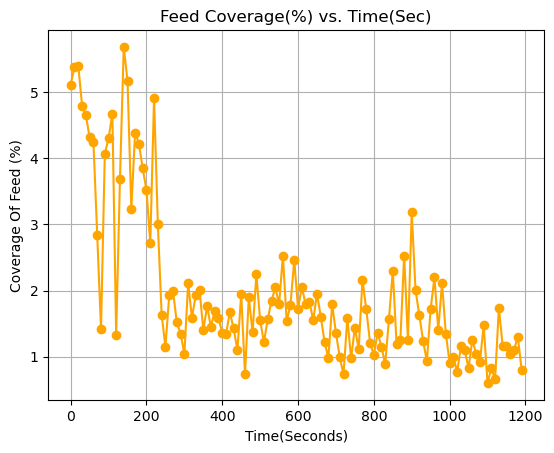

In [8]:
import matplotlib.pyplot as plt


t = (len(coverage_list)) * 10

time = np.arange(0, t, 10)
cov = coverage_list

plt.plot(time, cov, marker='o',color="orange")

plt.title('Feed Coverage(%) vs. Time(Sec)')
plt.xlabel('Time(Seconds)')
plt.ylabel('Coverage Of Feed (%)')

plt.grid(True)

plt.show()

以下為擬合部分，包括各種擬合辦法和評測指標的計算

In [9]:
cov_np = np.array(coverage_list)

https://blog.csdn.net/jesseyule/article/details/95245350


判断折线图拟合的好坏可以使用多个评估指标来衡量拟合的准确性和质量。以下是一些常用的指标：


平均绝对误差（Mean Absolute Error，MAE）：计算拟合曲线与原始数据点之间的平均绝对差异。较低的 MAE 值表示拟合效果较好。

均方误差（Mean Squared Error，MSE）：计算拟合曲线与原始数据点之间的平均平方差。较低的 MSE 值表示拟合效果较好。

决定系数（Coefficient of Determination，R²）：衡量拟合曲线对原始数据的解释程度。取值范围从0到1，越接近1表示拟合效果越好。

可视化比较：将拟合曲线与原始数据点一起绘制在折线图上，直观地比较拟合曲线与实际数据的吻合程度。


这些指标可以使用 Python 的相应库和函数进行计算，例如使用 NumPy 或 Scikit-learn 库中的函数。同时，可视化比较可以使用 Matplotlib 或其他绘图库来实现。

需要注意的是，拟合效果的好坏还应根据具体的数据和应用背景来判断，不同的问题可能需要关注不同的指标。因此，选择适当的评估指标是根据具体情况进行的

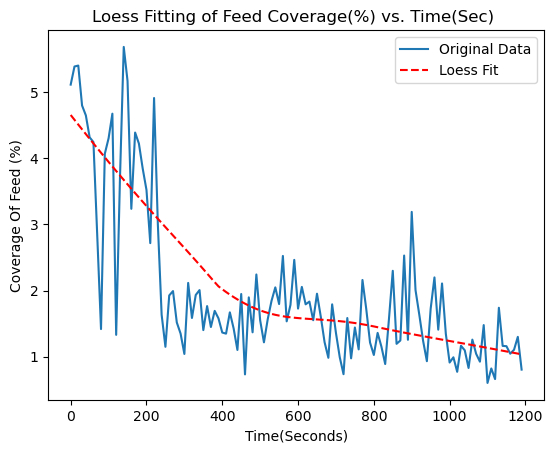

决定系数 R-squared： 0.6364522743791476
均方误差 MSE： 0.5388214342491793
平均绝对误差 MAE： 0.5284933518484504


In [10]:
# 局部加权散点平滑法（Loess）

import numpy as np
import statsmodels.api as sm

# 假设有一组 x 和 y 数据
x = np.arange(0, 1200, 10)
y = cov_np

# 使用 lowess 函数进行 Loess 拟合
loess_fit = sm.nonparametric.lowess(y, x)

# 提取拟合值
x_fit = loess_fit[:, 0]
y_fit = loess_fit[:, 1]

# 绘制原始数据和平滑后的曲线
plt.plot(x, y, label='Original Data')
plt.plot(x_fit, y_fit, 'r--',label='Loess Fit')
plt.title('Loess Fitting of Feed Coverage(%) vs. Time(Sec) ')
plt.xlabel('Time(Seconds)')
plt.ylabel('Coverage Of Feed (%)')
plt.legend()

# 显示图像
plt.show()

# 计算决定系数 R-squared
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_fit)**2)
r_squared = 1 - (ss_residual / ss_total)

# 计算均方误差 MSE
mse = np.mean((y - y_fit)**2)

# 计算平均绝对误差 MAE
mae = np.mean(np.abs(y - y_fit))

# 打印结果
print("决定系数 R-squared：", r_squared)
print("均方误差 MSE：", mse)
print("平均绝对误差 MAE：", mae)




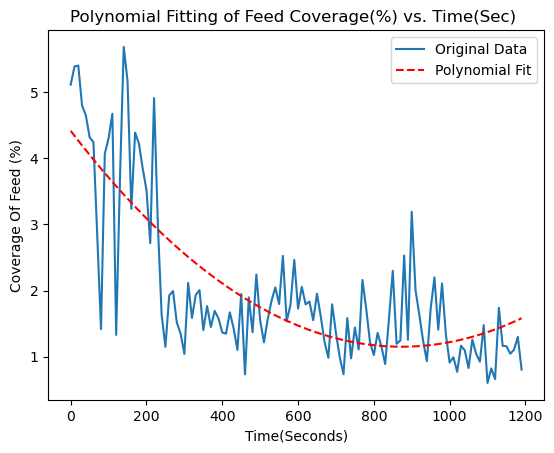

Fitting Parameters： 4.2822967619572955e-06 -0.0074767026422696 4.414630350827777
决定系数 R-squared： 0.6013692632142615
均方误差 MSE： 0.5908186743951913
平均绝对误差 MAE： 0.5812830875419261


In [11]:
# 多项式拟合（一元二次方程） 拟合法 Polynomial Regression

import numpy as np
from scipy.optimize import curve_fit

# 定义一元二次方程模型函数
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# 假设有一组 x 和 y 数据
x = np.arange(0, 1200, 10)
y = cov_np

# 使用 curve_fit 函数拟合一元二次方程模型
params, _ = curve_fit(quadratic_func, x, y)

# 提取拟合参数
a, b, c = params

# 计算拟合值
y_fit = quadratic_func(x, a, b, c)

# 计算决定系数 R-squared
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_fit)**2)
r_squared = 1 - (ss_residual / ss_total)

# 计算均方误差 MSE
mse = np.mean((y - y_fit)**2)

# 计算平均绝对误差 MAE
mae = np.mean(np.abs(y - y_fit))

# 绘制原始数据和拟合曲线
plt.plot(x, y, label='Original Data')
plt.plot(x, y_fit, 'r--', label='Polynomial Fit')
plt.title('Polynomial Fitting of Feed Coverage(%) vs. Time(Sec) ')
plt.xlabel('Time(Seconds)')
plt.ylabel('Coverage Of Feed (%)')
plt.legend()

# 显示图像
plt.show()


# 打印结果
print("Fitting Parameters：", a, b, c)
print("决定系数 R-squared：", r_squared)
print("均方误差 MSE：", mse)
print("平均绝对误差 MAE：", mae)



Fitting Parameters： 4.2822967619572955e-06 -0.0074767026422696 4.414630350827777
决定系数（R²）: 0.672688831687522
均方误差（MSE）: 0.4851145000418293
平均绝对误差（MAE）: 0.4887101736773461


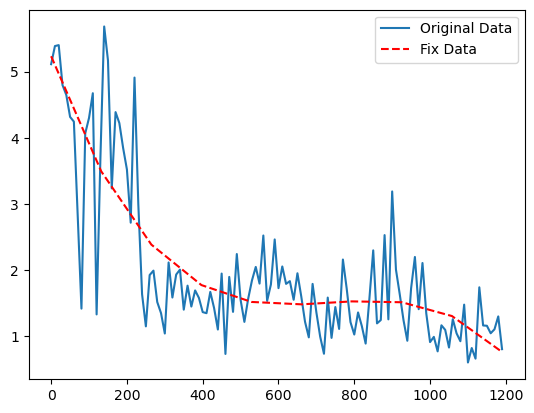

In [12]:
import numpy as np
from scipy.interpolate import UnivariateSpline

# 原始数据
x = np.arange(0, 1200, 10)
y = cov_np

# 使用样条插值拟合(加上噪声数据插值)
spline = UnivariateSpline(x, y)
x_fit = np.linspace(x.min(), x.max(), 10)  # 拟合的x值范围
y_fit = spline(x_fit)  # 拟合的y值

# 计算决定系数（R²）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - spline(x)) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# 计算均方误差（MSE）
mse = np.mean((y - spline(x)) ** 2)

# 计算平均绝对误差（MAE）
mae = np.mean(np.abs(y - spline(x)))


# 绘制原始折线图和平滑曲线
plt.plot(x, y, label='Original Data')
plt.plot(x_fit, y_fit, 'r--', label='Fix Data')
plt.legend()

print("Fitting Parameters：", a, b, c)
print("决定系数（R²）:", r_squared)
print("均方误差（MSE）:", mse)
print("平均绝对误差（MAE）:", mae)


C:\Users\katyh\AppData\Local\Temp\ipykernel_24504\3425916865.py:10: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


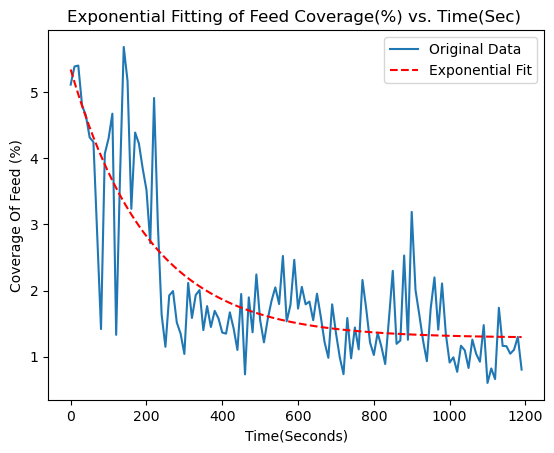

决定系数（R²）: 0.6589065515112753
均方误差（MSE）: 0.5055414961373409
平均绝对误差（MAE）: 0.49730708040737853


In [13]:
## exponential_func Fitting


import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
 
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c


x = np.arange(0, t, 10)
y = cov_np

# 使用 curve_fit 函数进行拟合，获取拟合参数和协方差矩阵
params, cov_matrix = curve_fit(exponential_func, x, y)

# 提取拟合参数
a, b, c = params
# 计算预测值
y_pred = exponential_func(x, a, b, c)

# 计算决定系数
r2 = r2_score(y, y_pred)

# 计算均方误差
mse = mean_squared_error(y, y_pred)

# 计算平均绝对误差
mae = mean_absolute_error(y, y_pred)

# 绘制原始数据
plt.plot(x, y, label='Original Data')

# 绘制拟合曲线
x_fit = np.linspace(min(x), max(x), 100)
y_fit = exponential_func(x_fit, a, b, c)
plt.plot(x_fit, y_fit, 'r--', label='Exponential Fit')
plt.title('Exponential Fitting of Feed Coverage(%) vs. Time(Sec) ')
plt.xlabel('Time(Seconds)')
plt.ylabel('Coverage Of Feed (%)')
plt.legend()
plt.show()


print("决定系数（R²）:", r2)
print("均方误差（MSE）:", mse)
print("平均绝对误差（MAE）:", mae)


In [14]:
i,j,k =params

In [15]:
params_fix = [float(i),float(j),float(k)]

In [16]:
params

array([4.05728271, 0.00485344, 1.28430645])

In [17]:
params_fix

[4.057282710346962, 0.004853443878944082, 1.2843064487003766]

[5.079041280864198, 600, 0.6038290895061729]
[  4.05728644 206.03842353   1.28430857]


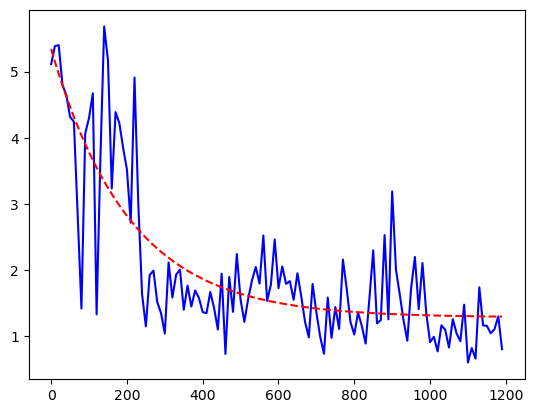

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
pi = np.pi

# 一组实验数据

x = np.arange(0, t, 10)
y = cov_np

fig, ax = plt.subplots()
ax.plot(x, y, 'b')


# 拟合指数曲线
def target_func(x, a0, a1, a2):
    return a0 * np.exp(-x / a1) + a2


a0 = max(y) - min(y)
a1 = x[round(len(x) / 2)]
a2 = min(y)
p0 = [a0, a1, a2]
print(p0)
para, cov = optimize.curve_fit(target_func, x, y, p0=p0)
print(para)

y_fit = [target_func(a, *para) for a in x]
ax.plot(x, y_fit, 'r--')

plt.show()
